In [1]:
import pandas as pd

In [25]:
df=pd.read_csv("Amazon sales.csv")

In [27]:
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [29]:
df.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,02-10-2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [31]:
df = df.dropna()

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


In [35]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [37]:
df.shape()

TypeError: 'tuple' object is not callable

In [57]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format='%m-%d-%Y')


In [59]:
df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month

In [61]:
df = df.dropna()


In [63]:
monthly_sales = df.groupby(['Year', 'Month']).agg({'Total Revenue': 'sum'}).reset_index()
monthly_sales['Year-Month'] = monthly_sales['Year'].astype(str) + '-' + monthly_sales['Month'].astype(str)

In [65]:
import matplotlib.pyplot as plt

In [67]:
!pip install seaborn

In [71]:
import seaborn as sns

In [73]:
plt.figure(figsize=(14, 7))


<Figure size 1400x700 with 0 Axes>

<Figure size 1400x700 with 0 Axes>

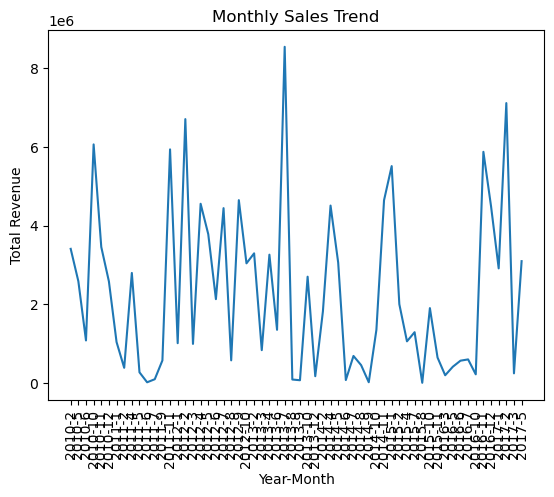

In [123]:
sns.lineplot(data=monthly_sales, x='Year-Month', y='Total Revenue')
plt.xticks(rotation=90)
plt.title('Monthly Sales Trend')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.show()

In [89]:
yearly_sales = df.groupby('Year').agg({'Total Revenue': 'sum'}).reset_index()

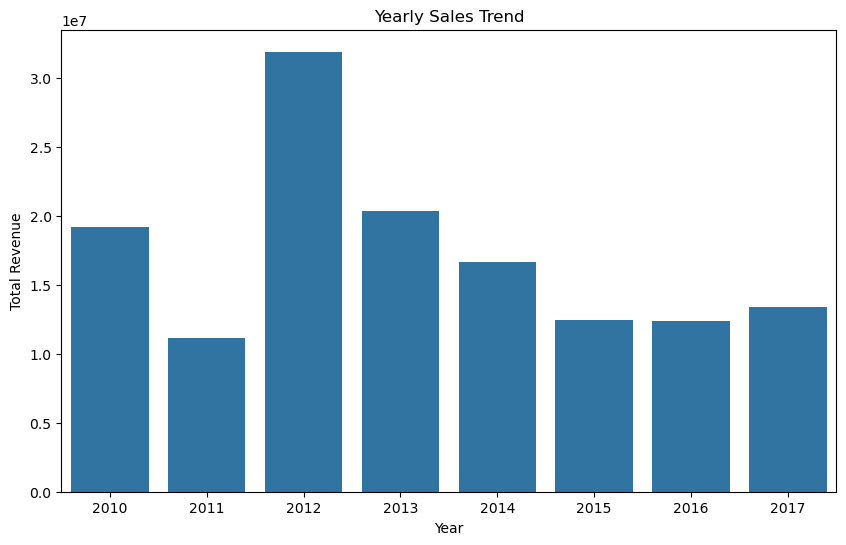

In [91]:
plt.figure(figsize=(10, 6))
sns.barplot(data=yearly_sales, x='Year', y='Total Revenue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

In [93]:
pivot_table = df.pivot_table(values='Total Revenue', index='Year', columns='Month', aggfunc='sum', fill_value=0)

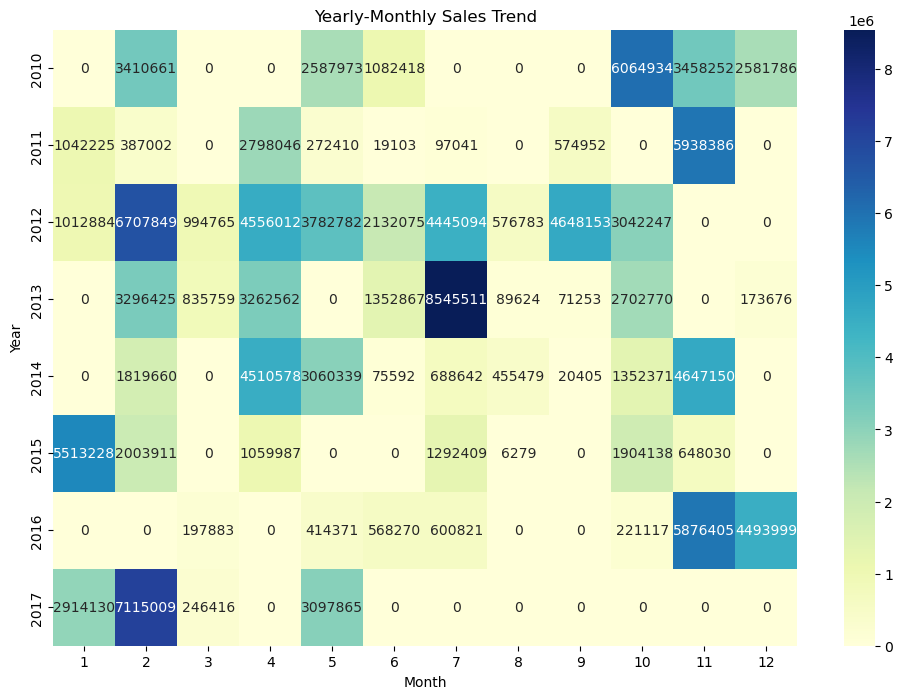

In [103]:
plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Yearly-Monthly Sales Trend')
plt.xlabel('Month')
plt.ylabel('Year')
plt.show()


In [97]:
total_revenue = df['Total Revenue'].sum()

In [99]:
avg_revenue_per_order = df['Total Revenue'].mean()

In [101]:
total_orders = df['Order ID'].nunique()


In [105]:
revenue_by_item_type = df.groupby('Item Type').agg({'Total Revenue': 'sum'}).reset_index()

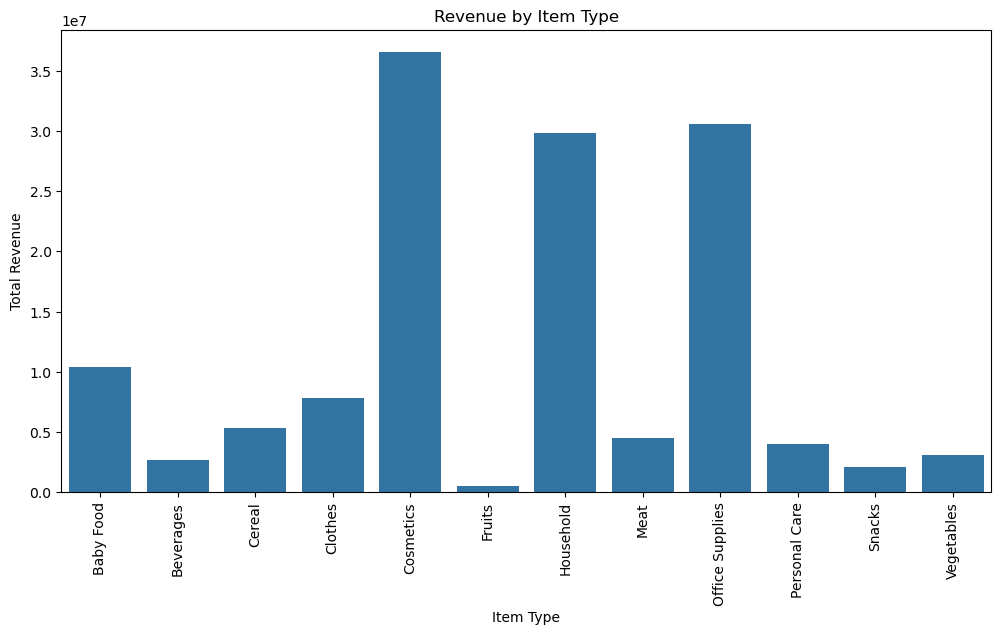

In [107]:
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_item_type, x='Item Type', y='Total Revenue')
plt.xticks(rotation=90)
plt.title('Revenue by Item Type')
plt.xlabel('Item Type')
plt.ylabel('Total Revenue')
plt.show()

In [109]:
print(f'Total Revenue: ${total_revenue:,.2f}')

Total Revenue: $137,348,768.31


In [111]:
print(f'Average Revenue per Order: ${avg_revenue_per_order:,.2f}')

Average Revenue per Order: $1,373,487.68


In [113]:
print(f'Total Number of Orders: {total_orders}')

Total Number of Orders: 100


In [115]:
correlation = df[['Unit Price', 'Units Sold']].corr()
print('Correlation between Unit Price and Units Sold:')
print(correlation)

Correlation between Unit Price and Units Sold:
            Unit Price  Units Sold
Unit Price    1.000000   -0.070486
Units Sold   -0.070486    1.000000


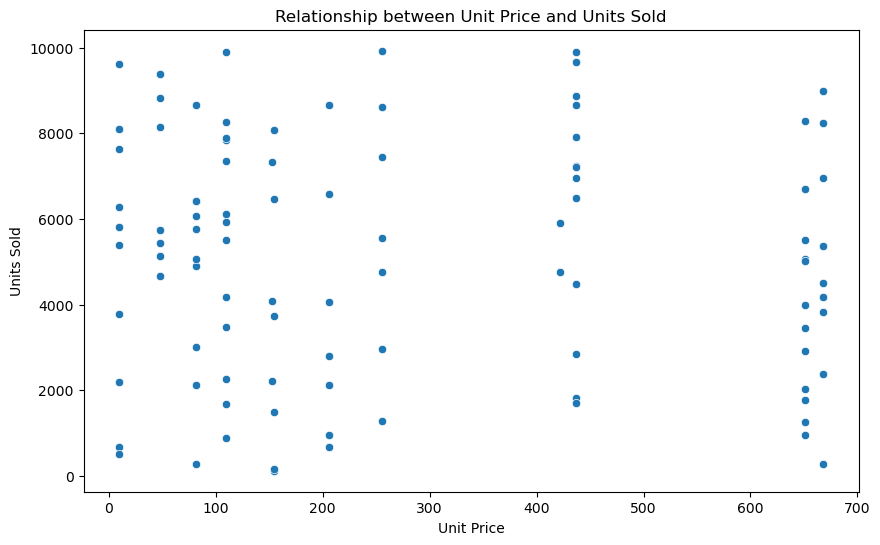

In [117]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Unit Price', y='Units Sold')
plt.title('Relationship between Unit Price and Units Sold')
plt.xlabel('Unit Price')
plt.ylabel('Units Sold')
plt.show()

In [119]:
revenue_by_region = df.groupby('Region').agg({'Total Revenue': 'sum'}).reset_index()


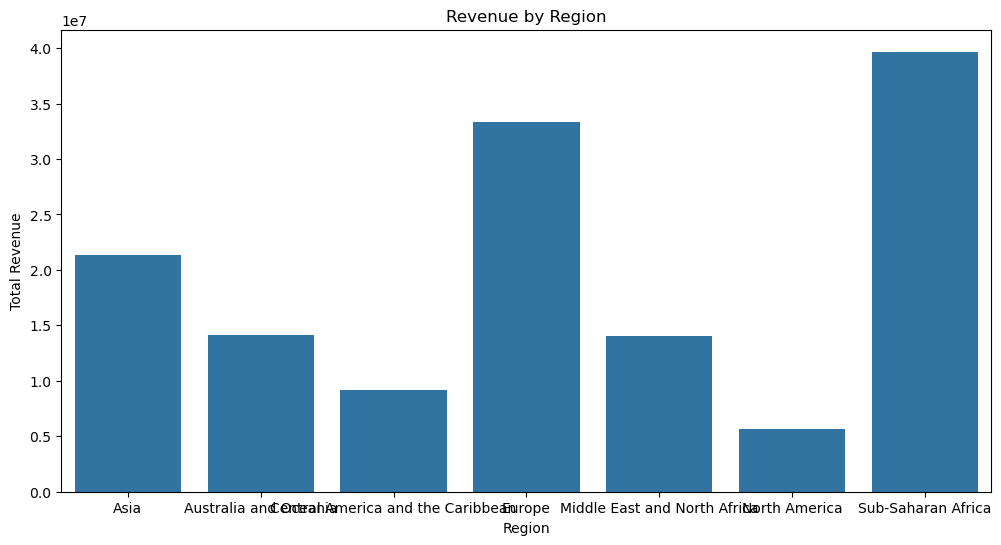

In [121]:
plt.figure(figsize=(12, 6))
sns.barplot(data=revenue_by_region, x='Region', y='Total Revenue')
plt.title('Revenue by Region')
plt.xlabel('Region')
plt.ylabel('Total Revenue')
plt.show()